In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_est = pd.read_csv('../data/constraint/genebayes_scores.tsv', sep = '\t')

In [3]:
df_1m = pd.read_csv('../data/constraint/rgc_scores.tsv', sep = '\t')

In [4]:
df = df_est.merge(df_1m, left_on = 'ensg', right_on = 'GeneId', how = 'inner')

              est_mean_log  rgc_mean_log
est_mean_log      1.000000      0.849432
rgc_mean_log      0.849432      1.000000


(-10.0, 0.0)

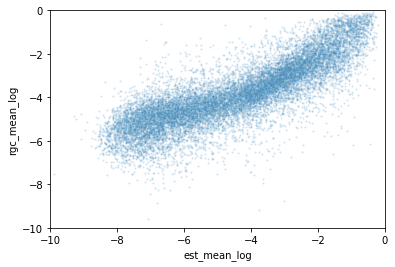

In [5]:
df['rgc_mean_log'] = np.log(df['mean'])
df['rgc_lb_log'] = np.log(df['shet_lower'])
df['rgc_ub_log'] = np.log(df['shet_upper'])
df['est_mean_log'] = np.log(df['post_mean'])
df['est_lb_log'] = np.log(df['post_lower_95'])
df['est_ub_log'] = np.log(df['post_upper_95'])
sns.scatterplot(data = df, x = 'est_mean_log', y='rgc_mean_log', s= 4, alpha = 0.2)
print(df[['est_mean_log', 'rgc_mean_log']].corr(method='spearman'))
plt.xlim(-10, 0)
plt.ylim(-10, 0)

In [97]:
df.columns

Index(['ensg', 'hgnc', 'chrom', 'obs_lof', 'exp_lof', 'prior_mean',
       'post_mean', 'post_lower_95', 'post_upper_95', 'GeneName', 'GeneId',
       'TranscriptId', 'mean', 'sd', 'shet_lower', 'shet_upper',
       'shet_constrained', 'n', 'N_total', 'mutation_rate', 'MAF',
       'CDS_length', 'pKO', 'oe_lof', 'loeuf', 'loeuf_underpower',
       'annotations', 'rgc_mean_log', 'rgc_lb_log', 'est_mean_log',
       'est_lb_log', 'rgc_ub_log', 'est_ub_log'],
      dtype='object')

,est_mean_log,rgc_mean_log
est_mean_log,1.000000,0.738797
rgc_mean_log,0.738797,1.000000


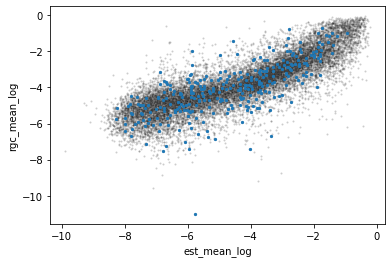

In [86]:

gpcrs = pd.read_csv('../data/families/gpcr_genes_human_gpcrdb.tsv', sep = '\t')
gpcrs = df.merge(gpcrs, left_on = 'GeneName', right_on = 'gene', how = 'inner')

sns.scatterplot(data = df, x = 'est_mean_log', y='rgc_mean_log', s= 4, alpha = 0.2, color='k')
gpcrs = gpcrs[['gene','exp_lof','obs_lof','loeuf','post_mean','n','rgc_mean_log','rgc_lb_log','rgc_ub_log','est_mean_log','est_lb_log','est_ub_log',]]
gpcrs
gpcrs.to_csv('../data/constraint/genebayes_rgc_gpcrs.tsv', sep = '\t', index = False)
plt.scatter(
    gpcrs.est_mean_log,
    gpcrs.rgc_mean_log,
    s = 5
)
gpcrs[['est_mean_log', 'rgc_mean_log']].corr(method='spearman')


<ErrorbarContainer object of 3 artists>

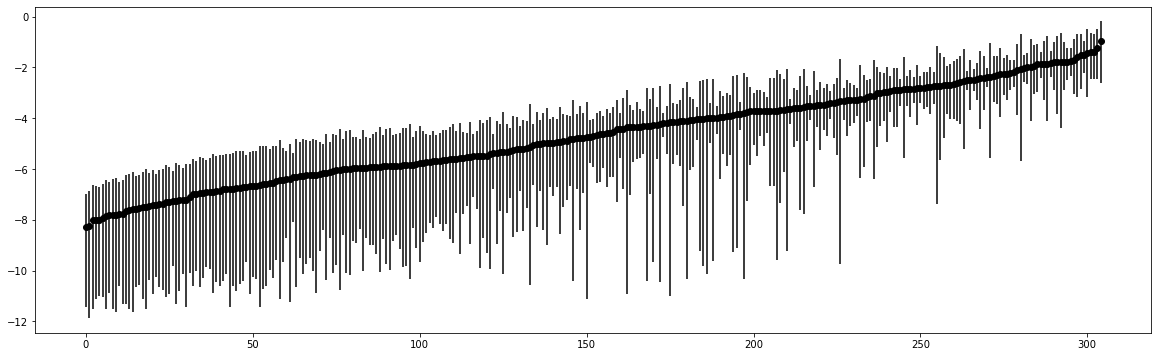

In [90]:
plt.subplots(figsize = (20, 6))
plt.errorbar(
    x = gpcrs.index, 
    y = gpcrs.est_mean_log,
    yerr = [gpcrs.est_mean_log - gpcrs.est_lb_log, gpcrs.est_ub_log - gpcrs.est_mean_log],
    fmt = 'o',
    color = 'k',
)

<ErrorbarContainer object of 3 artists>

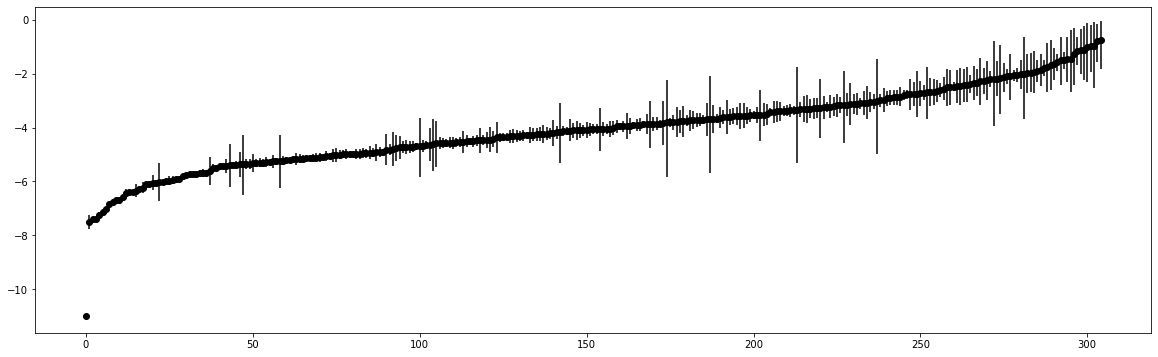

In [94]:
plt.subplots(figsize = (20, 6))
gpcrs = gpcrs.sort_values('rgc_mean_log').reset_index().drop('index', axis = 1)
plt.errorbar(
    x = gpcrs.index, 
    y = gpcrs.rgc_mean_log,
    yerr = [gpcrs.rgc_mean_log - gpcrs.rgc_lb_log, gpcrs.rgc_ub_log - gpcrs.rgc_mean_log],
    fmt = 'o',
    color = 'k',
)

In [93]:
gpcrs.head(20).reset_index().drop()

,gene,exp_lof,obs_lof,loeuf,post_mean,n,rgc_mean_log,rgc_lb_log,rgc_ub_log,est_mean_log,est_lb_log,est_ub_log
100,S1PR5,6.0796,2.0,NaN,0.003137,913,-11.006040,-11.070770,-10.941190,-5.764492,-9.640354,-4.299080
42,GPR35,5.8992,4.0,1.509,0.001136,61,-7.496199,-7.748423,-7.244781,-6.779802,-10.150668,-5.428187
185,MC3R,5.9974,9.0,1.931,0.018040,802,-7.409665,-7.478850,-7.341851,-4.015168,-9.825601,-2.489360
83,GPR87,10.7930,9.0,1.448,0.002613,1314,-7.404918,-7.458934,-7.350654,-5.947440,-10.007738,-4.453475
48,MTNR1A,8.3043,9.0,1.769,0.001242,364,-7.240618,-7.343767,-7.139406,-6.691073,-9.655847,-5.453557
24,NPFFR2,18.2840,13.0,1.130,0.000664,974,-7.146428,-7.208848,-7.083819,-7.316686,-11.039802,-5.859367
74,NTSR2,9.6641,5.0,1.087,0.002269,1073,-7.008608,-7.068843,-6.948961,-6.088535,-10.076651,-4.604366
133,KISS1R,9.7161,2.0,0.648,0.005838,679,-6.838400,-6.915482,-6.763276,-5.143401,-10.555493,-3.455641
123,GPRC5D,14.6360,7.0,NaN,0.004648,997,-6.765808,-6.828058,-6.703781,-5.371228,-8.955311,-4.123235
226,TAS2R40,5.8477,3.0,1.312,0.035430,549,-6.688927,-6.772926,-6.603963,-3.340183,-9.720333,-1.672362


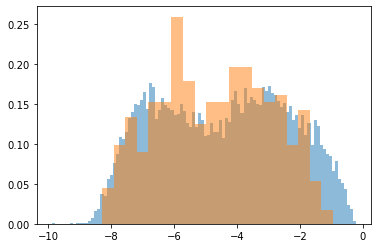

In [98]:
_ =plt.hist(df['est_mean_log'], bins=100, density=True, alpha = 0.5)
_ = plt.hist(gpcrs['est_mean_log'], bins = 20, density=True, alpha = 0.5)

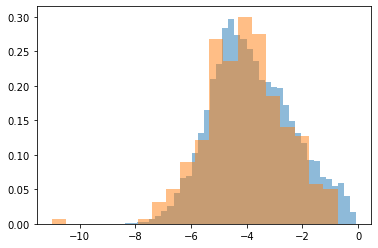

In [63]:
_ =plt.hist(df['rgc_mean_log'], bins=50, density=True, alpha = 0.5)
_ = plt.hist(gpcrs['rgc_mean_log'], bins = 20, density=True, alpha = 0.5)

In [50]:
gpcrs.columns

Index(['ensg', 'hgnc', 'chrom', 'obs_lof', 'exp_lof', 'prior_mean',
       'post_mean', 'post_lower_95', 'post_upper_95', 'GeneName', 'GeneId',
       'TranscriptId', 'mean', 'sd', 'shet_lower', 'shet_upper',
       'shet_constrained', 'n', 'N_total', 'mutation_rate', 'MAF',
       'CDS_length', 'pKO', 'oe_lof', 'loeuf', 'loeuf_underpower',
       'annotations', 'rgc_mean_log', 'est_mean_log', 'entry_name', 'name',
       'accession', 'receptor_class', 'receptor_family', 'ligand_type',
       'subfamily', 'is_orphan', 'gene', 'gene_names', 'gene_gnomad',
       'transcript'],
      dtype='object')

In [80]:
gpcrs

,gene,exp_lof,obs_lof,loeuf,post_mean,n,rgc_mean_log,rgc_lb_log,est_mean_log,est_lb_log
100,S1PR5,6.0796,2.0,NaN,0.003137,913,-11.006040,-11.070770,-5.764492,-9.640354
42,GPR35,5.8992,4.0,1.509,0.001136,61,-7.496199,-7.748423,-6.779802,-10.150668
185,MC3R,5.9974,9.0,1.931,0.018040,802,-7.409665,-7.478850,-4.015168,-9.825601
83,GPR87,10.7930,9.0,1.448,0.002613,1314,-7.404918,-7.458934,-5.947440,-10.007738
48,MTNR1A,8.3043,9.0,1.769,0.001242,364,-7.240618,-7.343767,-6.691073,-9.655847
...,...,...,...,...,...,...,...,...,...,...
304,GPR173,6.7655,0.0,0.442,0.386869,1,-0.999086,-2.295360,-0.949668,-2.597506
288,CHRM4,11.2830,0.0,0.265,0.156649,3,-0.988350,-1.944886,-1.853749,-4.123544
300,CXCR3,6.4955,2.0,NaN,0.241565,0,-0.977451,-2.537767,-1.420615,-3.173734
252,GPR22,16.2650,5.0,0.646,0.062618,5,-0.797221,-1.566109,-2.770695,-3.548108


In [69]:
np.log(0.075)

-2.5902671654458267